# CNN Creation and evaluation for the ck+ model

### This notebook was used in google collab using their free gpu runtime, it has been copied over to here

### Step 1 - Load the data from the csv and split into training and testing data, the data is then reshaped and one hot encoded

In [ ]:
#the coordinate csv is saved into google drive so google collab can use them
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('drive/MyDrive/face_landmarks_ck.csv')

valid_emotions = ['happy', 'anger', 'contempt', 'sadness']

df = df[df['label'].isin(valid_emotions)]


labels = df.iloc[:, 0].values
data = df.iloc[:, 1:].values

x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=42
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

from sklearn.preprocessing import OneHotEncoder

x_train_array = x_train
x_train_reshaped = x_train_array.reshape((x_train.shape[0], 478, 3))

x_test_array = x_test
x_test_reshaped = x_test_array.reshape((x_test.shape[0], 478, 3))

print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_encode = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encode = onehot_encoder.transform(y_test.reshape(-1, 1))


print(y_test_encode)

(336, 1434)
(336,)
(144, 1434)
(144,)
(336, 478, 3)
(144, 478, 3)
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1.

In [ ]:
predicted_labels_train = onehot_encoder.inverse_transform(y_train_encode)
predicted_labels_test = onehot_encoder.inverse_transform(y_test_encode)
print(predicted_labels_test)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Flatten, Conv1D, MaxPooling1D, Dropout, 

In [5]:
%load_ext tensorboard

### Step 2 - Train the model

In [21]:
import time
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()

model.add(Conv1D(64, kernel_size=3, input_shape = (478,3), activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

name = "{}".format( int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(name))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(x_train_reshaped, y_train_encode, epochs=500, validation_data=(x_test_reshaped, y_test_encode), batch_size=16, callbacks=[tensorboard])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 476, 64)           640       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 238, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 236, 64)           12352     
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 118, 64)           0         
 ng1D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 7552)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

### Step 3 - Evaluate

### Training graphs

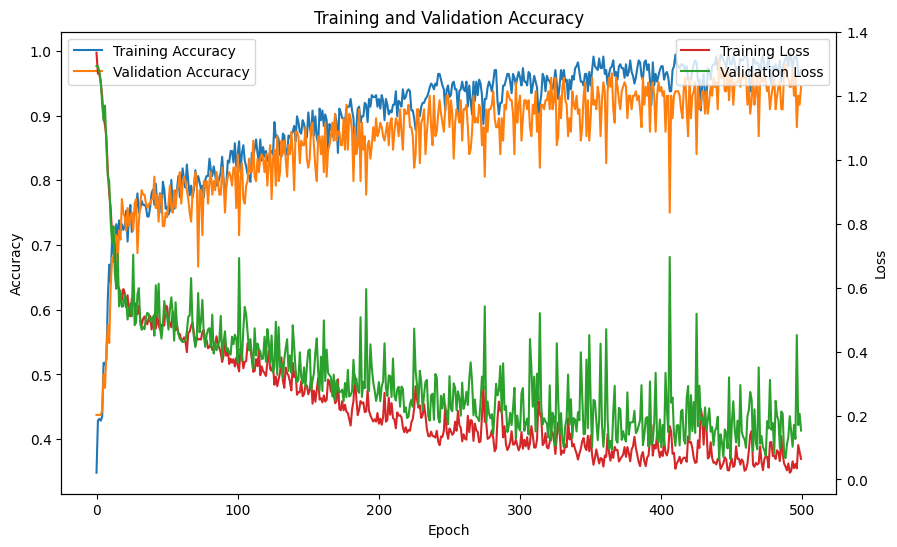

In [22]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# accuracy axis
ax1.plot(history.history['categorical_accuracy'], label='Training Accuracy', color='tab:blue')
ax1.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy', color='tab:orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='upper left')

# loss axis
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], label='Training Loss', color='tab:red')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='tab:green')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

plt.show()

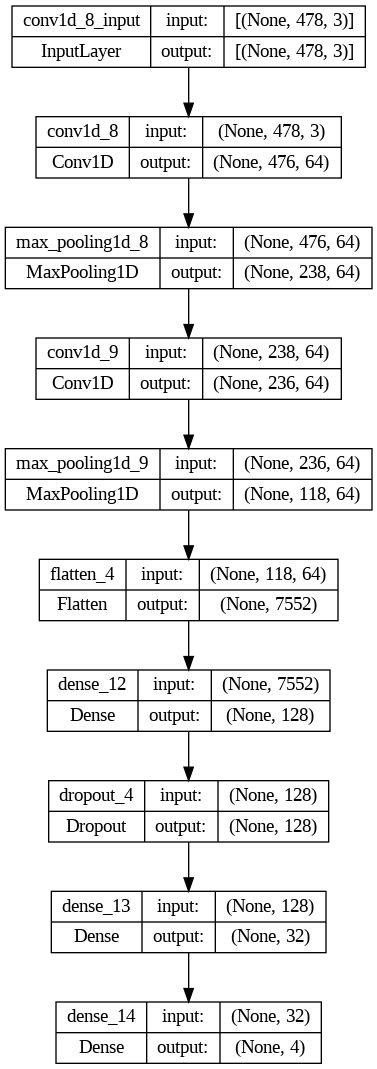

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
%tensorboard --logdir logs/

In [23]:
model.save('emotion_detection_model_ck-final.keras')

In [6]:
from keras.models import load_model

model = load_model('emotion_detection_model_ck-final.keras')

In [7]:
model.evaluate(x_test_reshaped, y_test_encode)

5/5 [==============================] - 3s 39ms/step - loss: 0.1530 - categorical_accuracy: 0.9444


[0.15301543474197388, 0.9444444179534912]

### Confusion matrix

In [8]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred_prob = model.predict(x_test_reshaped)

y_pred = np.argmax(y_pred_prob, axis=1)

y_test = np.argmax(y_test_encode, axis=1)

cm = confusion_matrix(y_test, y_pred)

5/5 [==============================] - 0s 4ms/step


In [9]:
#This code has been taken from the sklearn website for creating a confusion matrix

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
cm_plot_labels = ['angry', 'happy', 'sad', 'neutral']

Confusion matrix, without normalization
[[36  3  1  2]
 [ 0 21  0  0]
 [ 0  0 63  0]
 [ 1  1  0 16]]


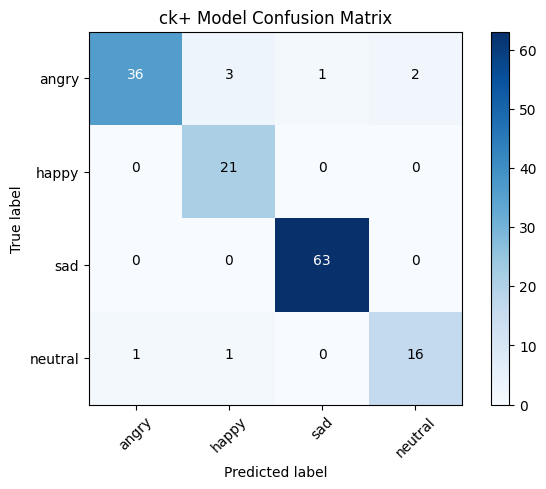

In [12]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='ck+ Model Confusion Matrix')

### Classification Report

In [13]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.84      1.00      0.91        21
           2       0.98      1.00      0.99        63
           3       0.89      0.89      0.89        18

    accuracy                           0.94       144
   macro avg       0.92      0.94      0.93       144
weighted avg       0.95      0.94      0.94       144

